## 1. Business Problem: Retaining Talents

When a employee leave their office, this mean the company will have to spend a lot of time and money with new interviews, hires, training new people... so in this notebook we did a predict analysis of an extensive dataset containing data of employees, their jobs, relationships, feelings... our mission was predict which person tends to leave the company based on the data of those who have already left. 

You can get the data on https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

## 2. Importing dataset and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',35)
sns.set_style('whitegrid')
df = pd.DataFrame(data=pd.read_csv('Human_resources.csv').values, 
                  columns=['Idade',
                          'Desgaste',
                          'ViagemNegocios',
                          'FaturamentoDiario',
                          'Departamento',
                          'DistanciaDeCasa',
                          'Educacao',
                          'AreaFormacao',
                          'EmployeeCount',
                          'Matricula',
                          'SatisfacaoComAmbiente',
                          'Genero',
                          'ValorHora',
                          'EnvolvimentoComTrabalho',
                          'NivelDoCargo',
                          'DescricaoCargo',
                          'SatisfacaoComTrabalho',
                          'EstadoCivil',
                          'RendaMensal',
                          'TaxaMensal',
                          'QtdEmpregosAnteriores',
                          'Over18',
                          'FazHoraExtra',
                          'PercentualAumento',
                          'NotaPerformance',
                          'SatisfacaoRelacionamentos',
                          'CargaHoraria',
                          'Acoes',
                          'TotalAnosTrabalhando',
                          'TempoTreinamentoAnoPassado',
                          'EquilibrioTrabalhoVida',
                          'TotalAnosNaEmpresa',
                          'AnosNaFuncao',
                          'AnosDesdePromocao',
                          'AnosComAtualGerente']) 
# traduzimos em português para facilitar a análise exploratória

## 3. Knowing the dataset and pre-processing

In [2]:
# Lets see 3 samples of our data
df.sample(3)

,Idade,Desgaste,ViagemNegocios,FaturamentoDiario,Departamento,DistanciaDeCasa,Educacao,AreaFormacao,EmployeeCount,Matricula,SatisfacaoComAmbiente,Genero,ValorHora,EnvolvimentoComTrabalho,NivelDoCargo,DescricaoCargo,SatisfacaoComTrabalho,EstadoCivil,RendaMensal,TaxaMensal,QtdEmpregosAnteriores,Over18,FazHoraExtra,PercentualAumento,NotaPerformance,SatisfacaoRelacionamentos,CargaHoraria,Acoes,TotalAnosTrabalhando,TempoTreinamentoAnoPassado,EquilibrioTrabalhoVida,TotalAnosNaEmpresa,AnosNaFuncao,AnosDesdePromocao,AnosComAtualGerente
1435,44,0,Travel_Rarely,1037,ResearchDevelopment,1,3,Medical,1,2020,2,Male,42,3,1,ResearchScientist,4,Single,2436,13422,6,Y,Yes,12,3,3,80,0,6,2,3,4,3,1,2
461,35,0,Travel_Rarely,195,Sales,1,3,Medical,1,620,1,Female,80,3,2,SalesExecutive,3,Single,4859,6698,1,Y,No,16,3,4,80,0,5,3,3,5,4,0,3
749,52,1,Travel_Rarely,266,Sales,2,1,Marketing,1,1038,1,Female,57,1,5,Manager,4,Married,19845,25846,1,Y,No,15,3,4,80,1,33,3,3,32,14,6,9


In [3]:
# Lets find how many lines and columns we have
df.shape

(1470, 35)

In [4]:
# Lets see the variables
[x for x in df.columns.values]

['Idade',
 'Desgaste',
 'ViagemNegocios',
 'FaturamentoDiario',
 'Departamento',
 'DistanciaDeCasa',
 'Educacao',
 'AreaFormacao',
 'EmployeeCount',
 'Matricula',
 'SatisfacaoComAmbiente',
 'Genero',
 'ValorHora',
 'EnvolvimentoComTrabalho',
 'NivelDoCargo',
 'DescricaoCargo',
 'SatisfacaoComTrabalho',
 'EstadoCivil',
 'RendaMensal',
 'TaxaMensal',
 'QtdEmpregosAnteriores',
 'Over18',
 'FazHoraExtra',
 'PercentualAumento',
 'NotaPerformance',
 'SatisfacaoRelacionamentos',
 'CargaHoraria',
 'Acoes',
 'TotalAnosTrabalhando',
 'TempoTreinamentoAnoPassado',
 'EquilibrioTrabalhoVida',
 'TotalAnosNaEmpresa',
 'AnosNaFuncao',
 'AnosDesdePromocao',
 'AnosComAtualGerente']

In [5]:
# Now we are dropping irrelevant data
df.drop(['EmployeeCount','Matricula','Over18','CargaHoraria'], axis=1, inplace=True)

In [6]:
# Checking if we got some missing data
df.isnull().sum()

Idade                         0
Desgaste                      0
ViagemNegocios                0
FaturamentoDiario             0
Departamento                  0
DistanciaDeCasa               0
Educacao                      0
AreaFormacao                  0
SatisfacaoComAmbiente         0
Genero                        0
ValorHora                     0
EnvolvimentoComTrabalho       0
NivelDoCargo                  0
DescricaoCargo                0
SatisfacaoComTrabalho         0
EstadoCivil                   0
RendaMensal                   0
TaxaMensal                    0
QtdEmpregosAnteriores         0
FazHoraExtra                  0
PercentualAumento             0
NotaPerformance               0
SatisfacaoRelacionamentos     0
Acoes                         0
TotalAnosTrabalhando          0
TempoTreinamentoAnoPassado    0
EquilibrioTrabalhoVida        0
TotalAnosNaEmpresa            0
AnosNaFuncao                  0
AnosDesdePromocao             0
AnosComAtualGerente           0
dtype: i

In [7]:
# Transforming numeric data
df['Idade'] = df['Idade'].astype(int)
df['FaturamentoDiario'] = df['FaturamentoDiario'].astype(float)
df['DistanciaDeCasa'] = df['DistanciaDeCasa'].astype(float)
df['ValorHora'] = df['ValorHora'].astype(float)
df['RendaMensal'] = df['RendaMensal'].astype(float)
df['TaxaMensal'] = df['TaxaMensal'].astype(float)
df['QtdEmpregosAnteriores'] = df['QtdEmpregosAnteriores'].astype(float)
df['PercentualAumento'] = df['PercentualAumento'].astype(float)
df['TotalAnosTrabalhando'] = df['TotalAnosTrabalhando'].astype(float)
df['TotalAnosNaEmpresa'] = df['TotalAnosNaEmpresa'].astype(float)
df['AnosNaFuncao'] = df['AnosNaFuncao'].astype(float)
df['AnosDesdePromocao'] = df['AnosDesdePromocao'].astype(float)
df['AnosComAtualGerente'] = df['AnosComAtualGerente'].astype(float)
df.dtypes

Idade                           int32
Desgaste                       object
ViagemNegocios                 object
FaturamentoDiario             float64
Departamento                   object
DistanciaDeCasa               float64
Educacao                       object
AreaFormacao                   object
SatisfacaoComAmbiente          object
Genero                         object
ValorHora                     float64
EnvolvimentoComTrabalho        object
NivelDoCargo                   object
DescricaoCargo                 object
SatisfacaoComTrabalho          object
EstadoCivil                    object
RendaMensal                   float64
TaxaMensal                    float64
QtdEmpregosAnteriores         float64
FazHoraExtra                   object
PercentualAumento             float64
NotaPerformance                object
SatisfacaoRelacionamentos      object
Acoes                          object
TotalAnosTrabalhando          float64
TempoTreinamentoAnoPassado     object
EquilibrioTr

## 4. Visualizing and getting know the data

In [8]:
# Lets count how many persons left the job
print('{} left the job {:.0f}%'.format(df.Desgaste.value_counts()[1], df.Desgaste.value_counts()[1]/len(df)*100))
print('{} stayed at the company {:.0f}%'.format(df.Desgaste.value_counts()[0],df.Desgaste.value_counts()[0]/len(df)*100))

237 left the job 16%
1233 stayed at the company 84%


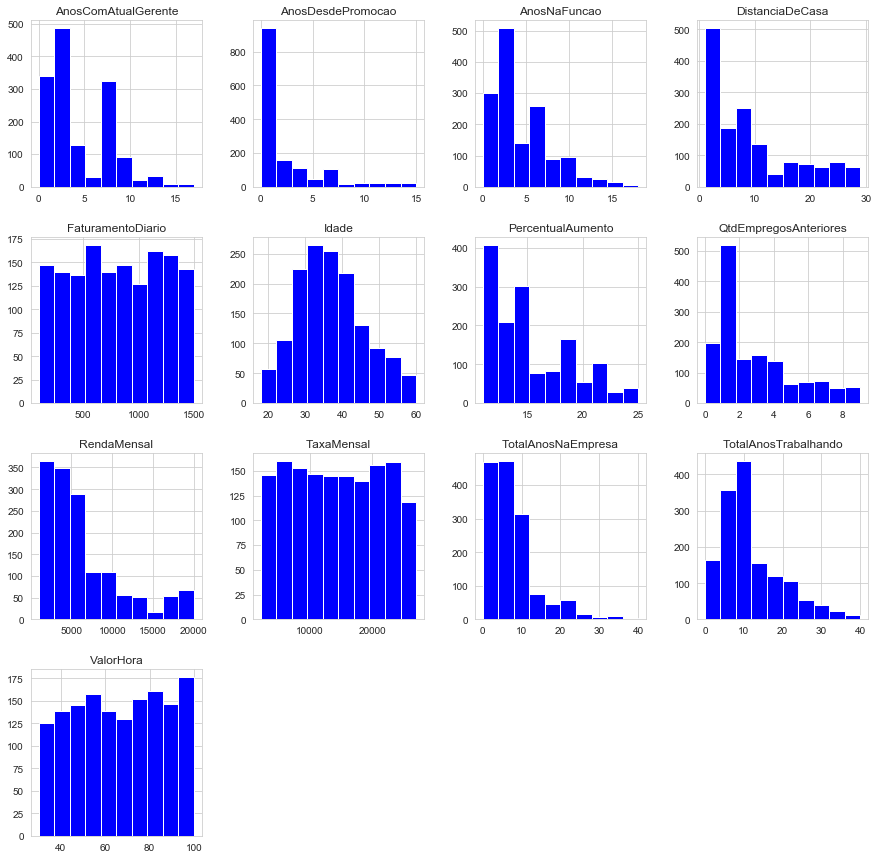

In [9]:
# Visualizing the distribution of data in each variable
df.hist(color = 'blue', figsize = [15,15])
plt.show()

In [10]:
# Splitting data between people who stayed and people who left
left = df[df['Desgaste'] == 1]
stayed = df[df['Desgaste'] == 0]

In [11]:
# Getting some statistics from people 
left.describe()

,Idade,FaturamentoDiario,DistanciaDeCasa,ValorHora,RendaMensal,TaxaMensal,QtdEmpregosAnteriores,PercentualAumento,TotalAnosTrabalhando,TotalAnosNaEmpresa,AnosNaFuncao,AnosDesdePromocao,AnosComAtualGerente
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,65.573840,4787.092827,14559.308017,2.940928,15.097046,8.244726,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,20.099958,3640.210367,7208.153264,2.678519,3.770294,7.169204,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,31.000000,1009.000000,2326.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,50.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,66.000000,3202.000000,14618.000000,1.000000,14.000000,7.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,84.000000,5916.000000,21081.000000,5.000000,17.000000,10.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,100.000000,19859.000000,26999.000000,9.000000,25.000000,40.000000,40.000000,15.000000,15.000000,14.000000


In [12]:
stayed.describe()

,Idade,FaturamentoDiario,DistanciaDeCasa,ValorHora,RendaMensal,TaxaMensal,QtdEmpregosAnteriores,PercentualAumento,TotalAnosTrabalhando,TotalAnosNaEmpresa,AnosNaFuncao,AnosDesdePromocao,AnosComAtualGerente
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,65.952149,6832.739659,14265.779400,2.64558,15.231144,11.862936,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,20.380754,4818.208001,7102.260749,2.46009,3.639511,7.760719,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,30.000000,1051.000000,2094.000000,0.00000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,48.000000,3211.000000,7973.000000,1.00000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,66.000000,5204.000000,14120.000000,2.00000,14.000000,10.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,83.000000,8834.000000,20364.000000,4.00000,18.000000,16.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26997.000000,9.00000,25.000000,38.000000,37.000000,18.000000,15.000000,17.000000


In [13]:
# If we check the means:
# Employees who left was younger
# People who stayed lives closer the job and have a higher income
# Who stayed works a longer time in the company

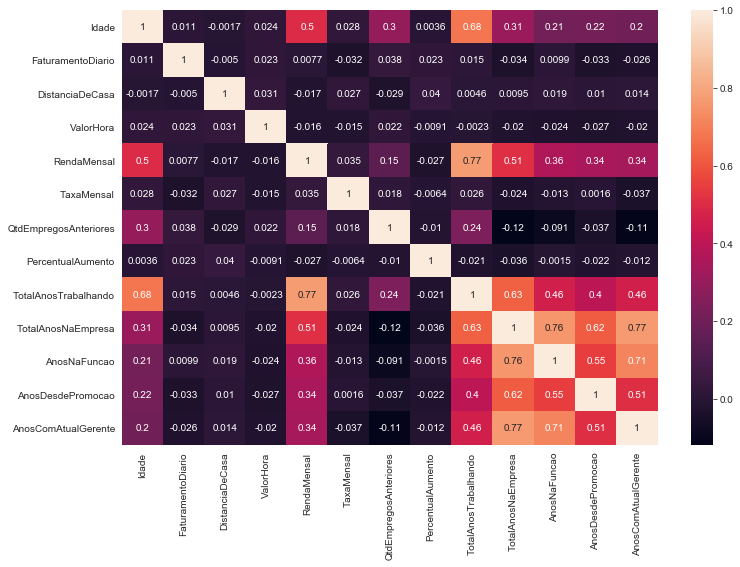

In [14]:
# About numeric variables, lets check their correlations
f, ax = plt.subplots(figsize=[12,8])
sns.heatmap(df.drop('Desgaste', axis=1).corr(), annot=True)
plt.show()

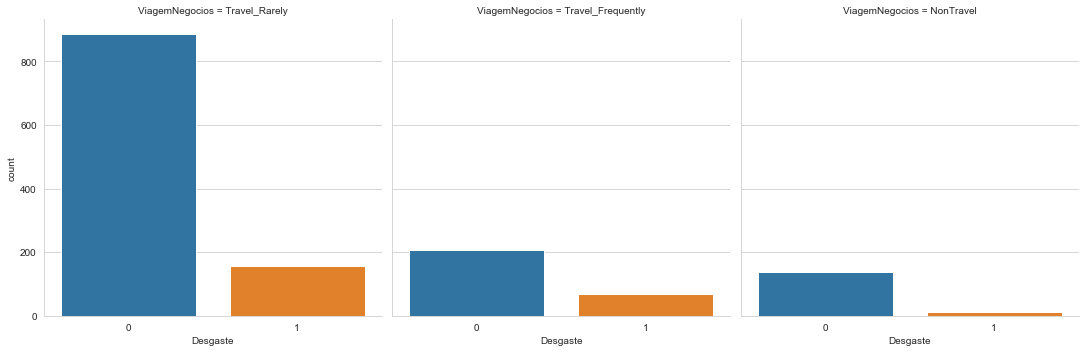

People who left:
Travel_Rarely        156
Travel_Frequently     69
NonTravel             12
Name: ViagemNegocios, dtype: int64

People who stayed:
Travel_Rarely        887
Travel_Frequently    208
NonTravel            138
Name: ViagemNegocios, dtype: int64

If we look at dismissal rate it is possible check which group had more dismiss on proportion themself:
Travel_Rarely 0.15
Travel_Frequently 0.25
NonTravel 0.08


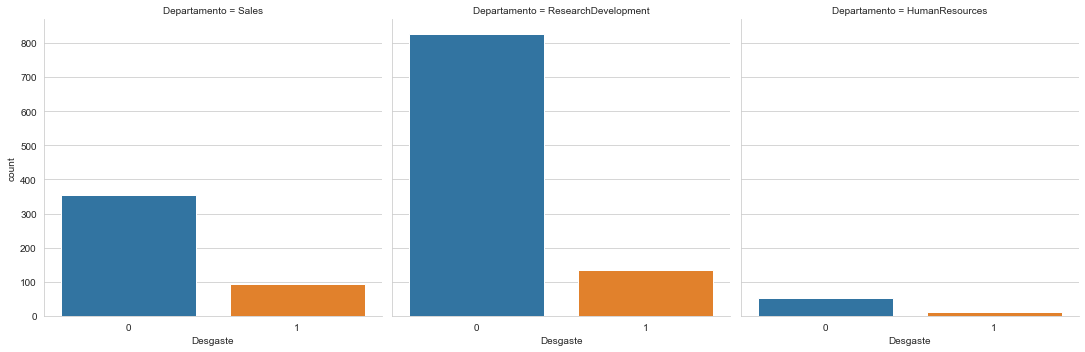

People who left:
ResearchDevelopment    133
Sales                   92
HumanResources          12
Name: Departamento, dtype: int64

People who stayed:
ResearchDevelopment    828
Sales                  354
HumanResources          51
Name: Departamento, dtype: int64

If we look at dismissal rate it is possible check which group had more dismiss on proportion themself:
ResearchDevelopment 0.14
Sales 0.21
HumanResources 0.19


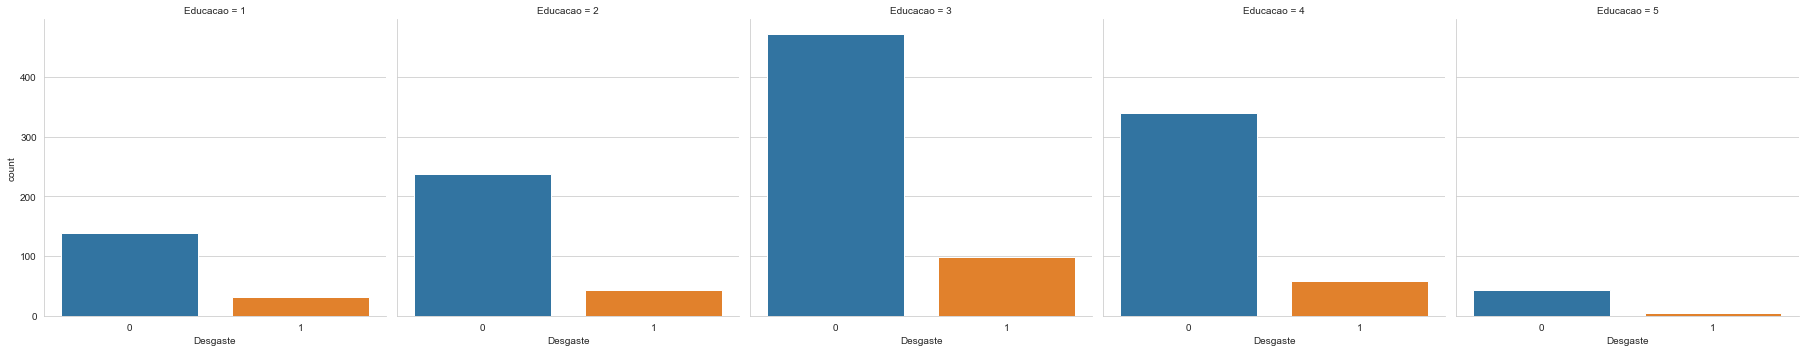

People who left:
3    99
4    58
2    44
1    31
5     5
Name: Educacao, dtype: int64

People who stayed:
3    473
4    340
2    238
1    139
5     43
Name: Educacao, dtype: int64

If we look at dismissal rate it is possible check which group had more dismiss on proportion themself:
3 0.17
4 0.15
2 0.16
1 0.18
5 0.10


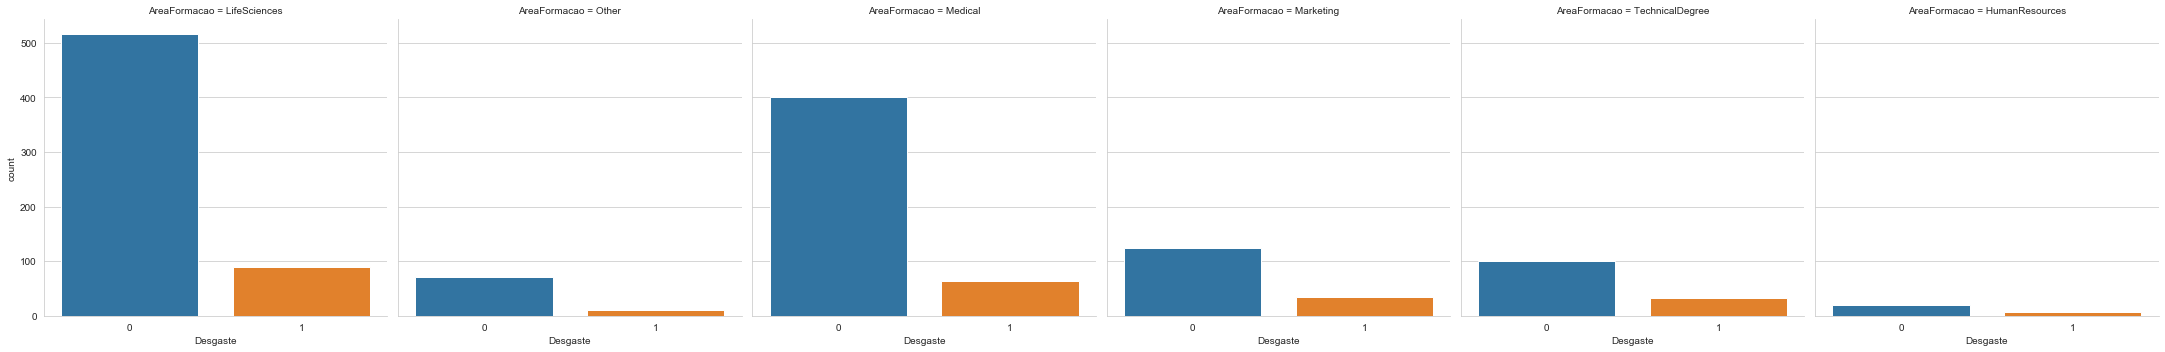

People who left:
LifeSciences       89
Medical            63
Marketing          35
TechnicalDegree    32
Other              11
HumanResources      7
Name: AreaFormacao, dtype: int64

People who stayed:
LifeSciences       517
Medical            401
Marketing          124
TechnicalDegree    100
Other               71
HumanResources      20
Name: AreaFormacao, dtype: int64

If we look at dismissal rate it is possible check which group had more dismiss on proportion themself:
LifeSciences 0.15
Medical 0.14
Marketing 0.22
TechnicalDegree 0.24
Other 0.13
HumanResources 0.26


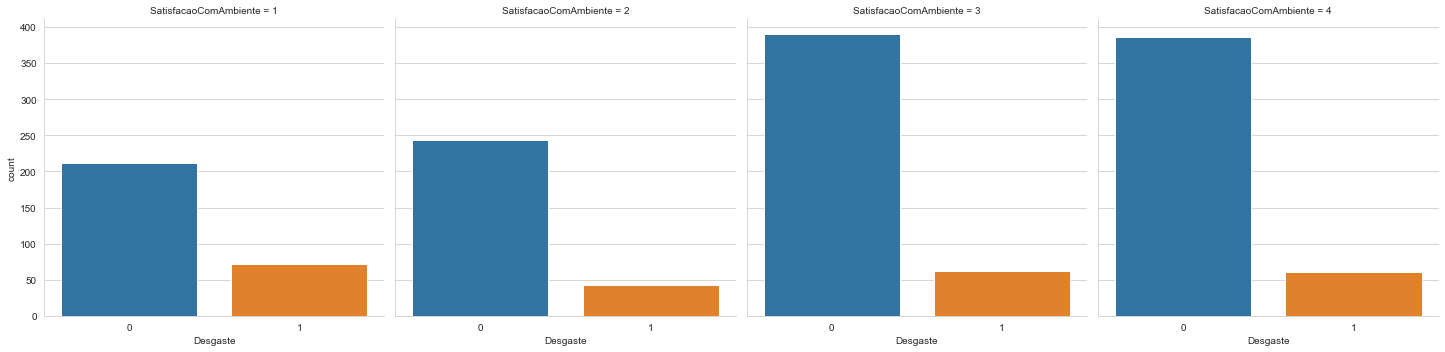

People who left:
1    72
3    62
4    60
2    43
Name: SatisfacaoComAmbiente, dtype: int64

People who stayed:
3    391
4    386
2    244
1    212
Name: SatisfacaoComAmbiente, dtype: int64

If we look at dismissal rate it is possible check which group had more dismiss on proportion themself:
3 0.16
4 0.14
2 0.20
1 0.17


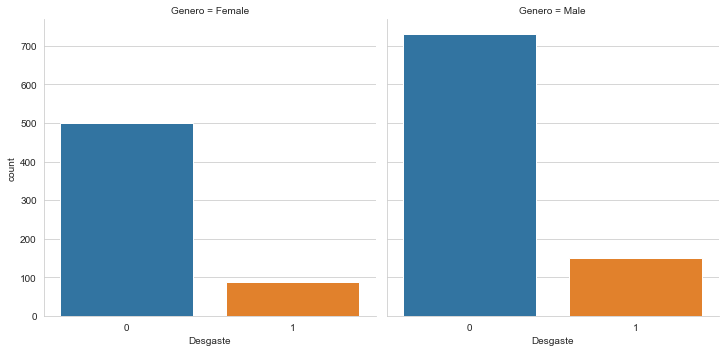

People who left:
Male      150
Female     87
Name: Genero, dtype: int64

People who stayed:
Male      732
Female    501
Name: Genero, dtype: int64

If we look at dismissal rate it is possible check which group had more dismiss on proportion themself:
Male 0.17
Female 0.15


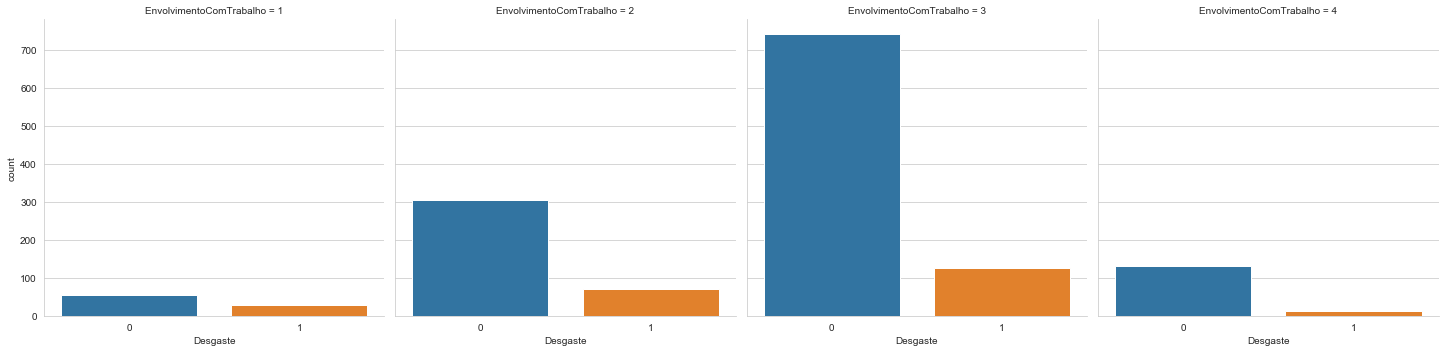

People who left:
3    125
2     71
1     28
4     13
Name: EnvolvimentoComTrabalho, dtype: int64

People who stayed:
3    743
2    304
4    131
1     55
Name: EnvolvimentoComTrabalho, dtype: int64

If we look at dismissal rate it is possible check which group had more dismiss on proportion themself:
3 0.14
2 0.19
4 0.18
1 0.19


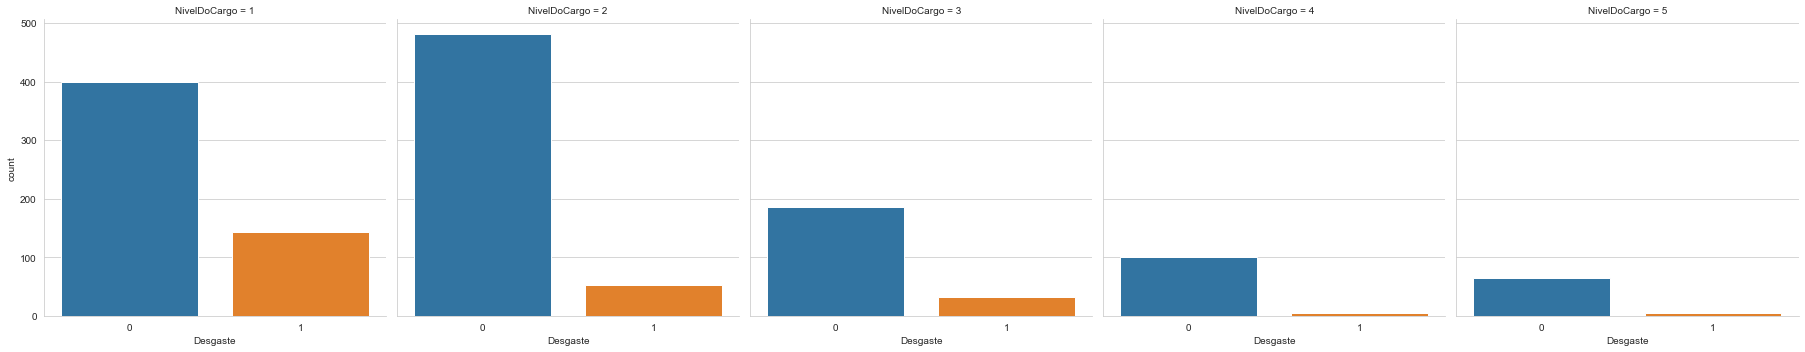

People who left:
1    143
2     52
3     32
5      5
4      5
Name: NivelDoCargo, dtype: int64

People who stayed:
2    482
1    400
3    186
4    101
5     64
Name: NivelDoCargo, dtype: int64

If we look at dismissal rate it is possible check which group had more dismiss on proportion themself:
2 0.23
1 0.12
3 0.15
4 0.05
5 0.07


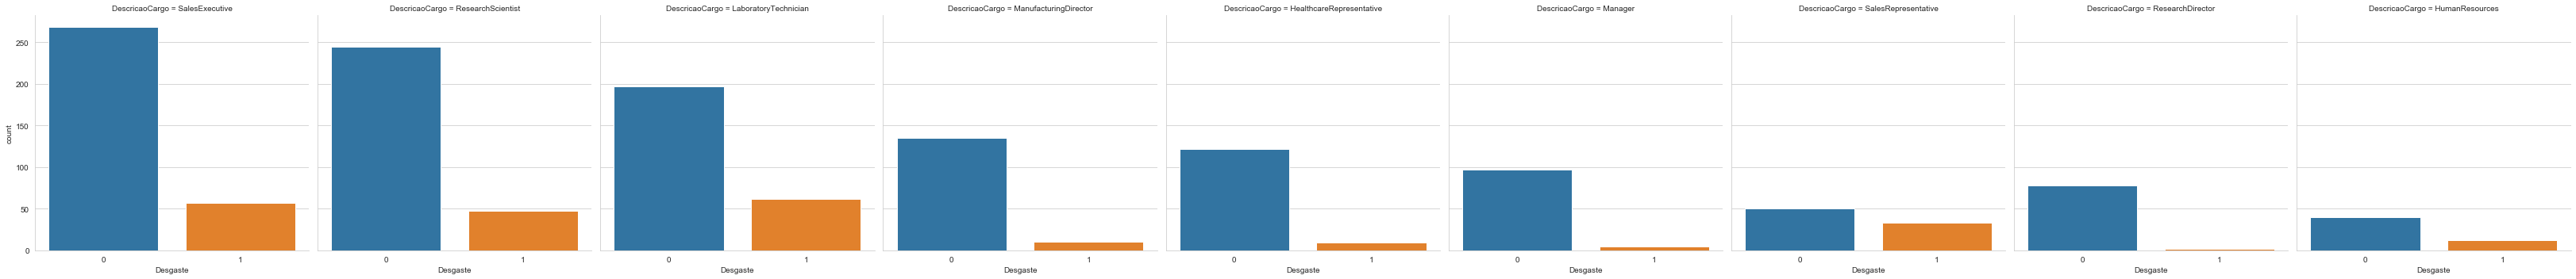

People who left:
LaboratoryTechnician        62
SalesExecutive              57
ResearchScientist           47
SalesRepresentative         33
HumanResources              12
ManufacturingDirector       10
HealthcareRepresentative     9
Manager                      5
ResearchDirector             2
Name: DescricaoCargo, dtype: int64

People who stayed:
SalesExecutive              269
ResearchScientist           245
LaboratoryTechnician        197
ManufacturingDirector       135
HealthcareRepresentative    122
Manager                      97
ResearchDirector             78
SalesRepresentative          50
HumanResources               40
Name: DescricaoCargo, dtype: int64

If we look at dismissal rate it is possible check which group had more dismiss on proportion themself:
SalesExecutive 0.19
ResearchScientist 0.19
LaboratoryTechnician 0.19
ManufacturingDirector 0.20
HealthcareRepresentative 0.09
Manager 0.09
ResearchDirector 0.10
SalesRepresentative 0.09
HumanResources 0.05


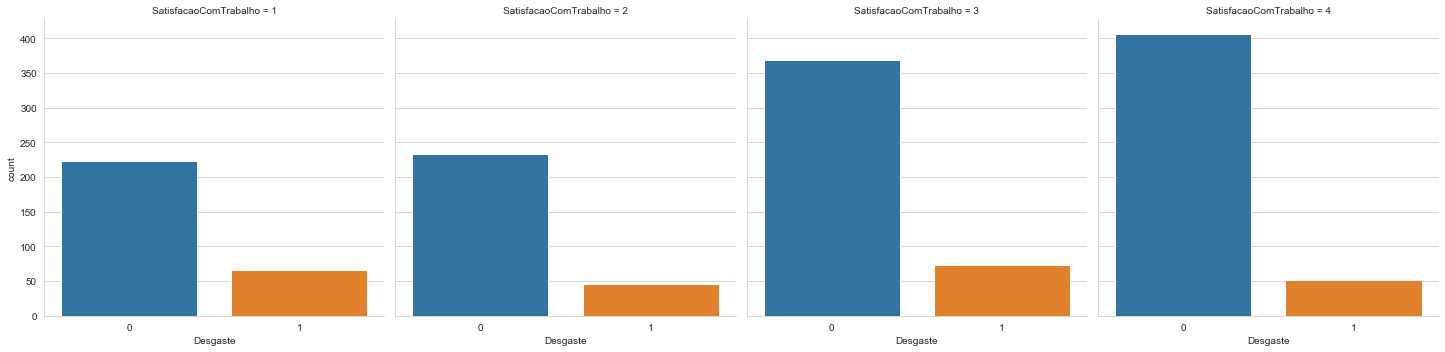

People who left:
3    73
1    66
4    52
2    46
Name: SatisfacaoComTrabalho, dtype: int64

People who stayed:
4    407
3    369
2    234
1    223
Name: SatisfacaoComTrabalho, dtype: int64

If we look at dismissal rate it is possible check which group had more dismiss on proportion themself:
4 0.15
3 0.15
2 0.18
1 0.17


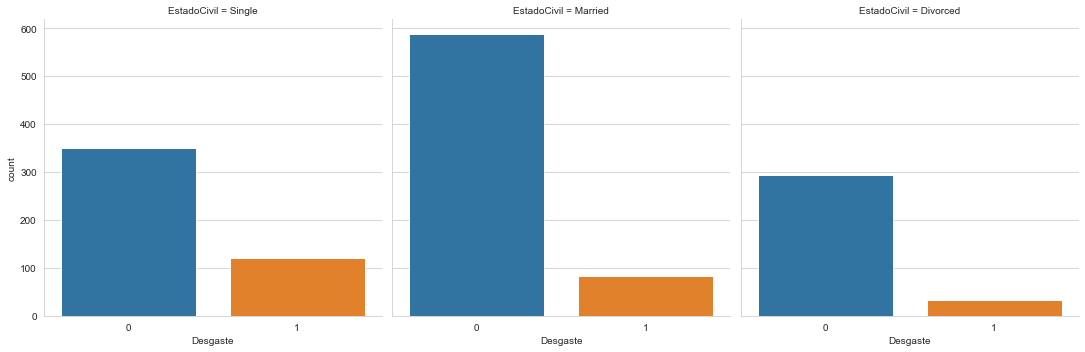

People who left:
Single      120
Married      84
Divorced     33
Name: EstadoCivil, dtype: int64

People who stayed:
Married     589
Single      350
Divorced    294
Name: EstadoCivil, dtype: int64

If we look at dismissal rate it is possible check which group had more dismiss on proportion themself:
Married 0.17
Single 0.19
Divorced 0.10


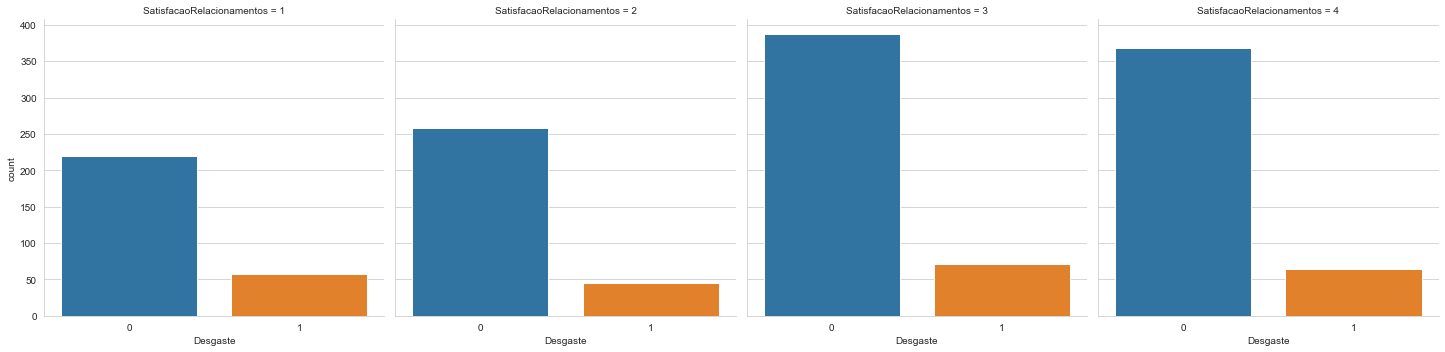

People who left:
3    71
4    64
1    57
2    45
Name: SatisfacaoRelacionamentos, dtype: int64

People who stayed:
3    388
4    368
2    258
1    219
Name: SatisfacaoRelacionamentos, dtype: int64

If we look at dismissal rate it is possible check which group had more dismiss on proportion themself:
3 0.15
4 0.15
2 0.18
1 0.17


In [15]:
# lets see absolut frequency of categories varibles and their dismissal rate
cat = ['ViagemNegocios','Departamento','Educacao','AreaFormacao',
 'SatisfacaoComAmbiente','Genero','EnvolvimentoComTrabalho','NivelDoCargo',
'DescricaoCargo','SatisfacaoComTrabalho','EstadoCivil',
 'SatisfacaoRelacionamentos']

for i in cat:
    data = df[[i,'Desgaste']]
    sns.catplot(col = i, x = 'Desgaste', data = data, kind = 'count')
    plt.show()
    print('People who left:')
    print(left[i].value_counts())
    print()
    print('People who stayed:')
    print(stayed[i].value_counts())
    print()
    print('If we look at dismissal rate it is possible check which group had more dismiss on proportion themself:')
    for p in np.arange(0,  len(stayed[i].value_counts().index)):
        print('{} {:.2f}'.format(stayed[i].value_counts().index[p], left[i].value_counts().values[p]/(left[i].value_counts().values[p]+stayed[i].value_counts().values[p])))

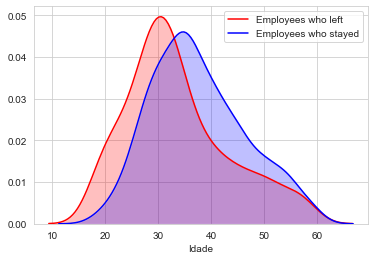

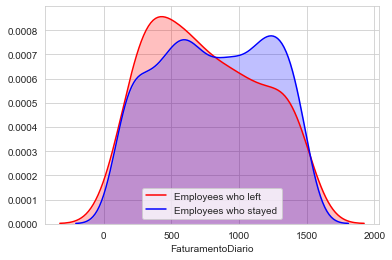

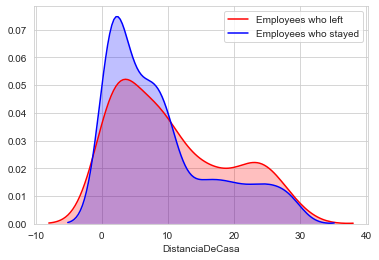

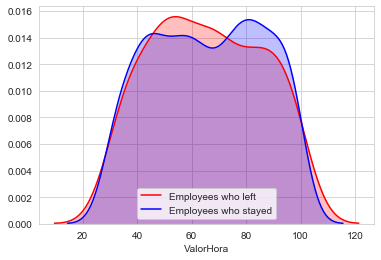

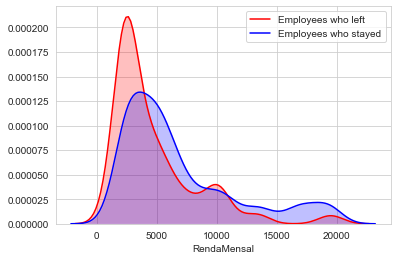

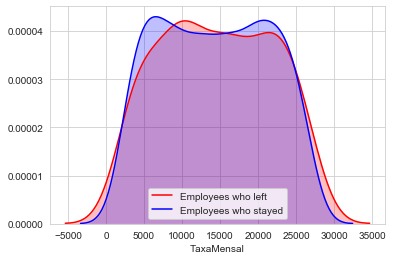

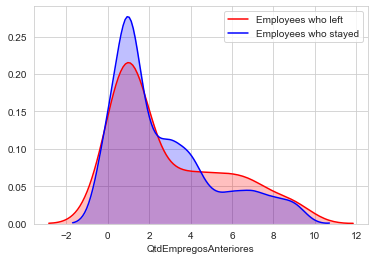

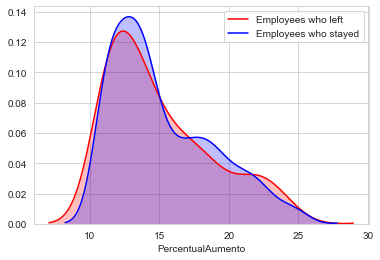

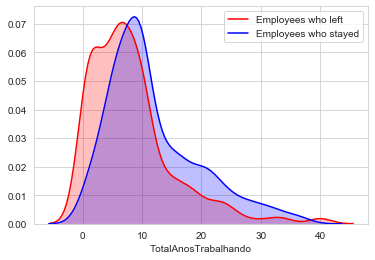

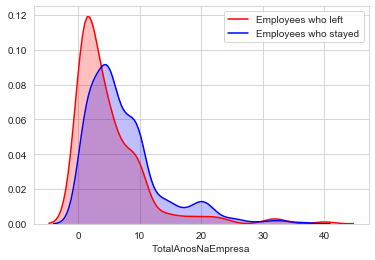

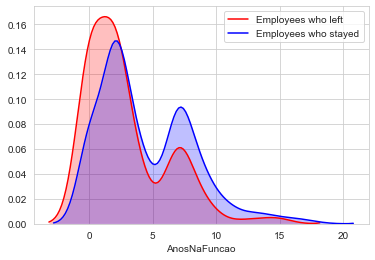

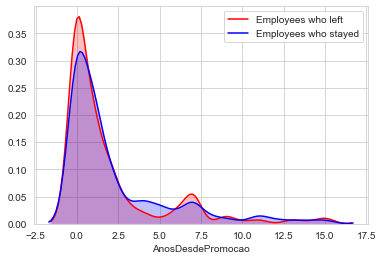

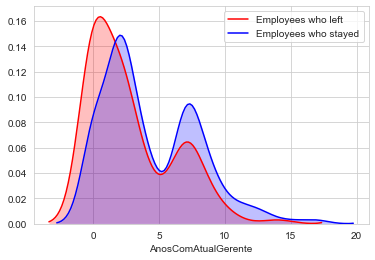

In [17]:
# Now we should plot kdeplot in numeric variables so we can know the tendencies of their distribution
for i in df.describe().columns:
    sns.kdeplot(left[i], label = 'Employees who left', shade = True, color = 'r')
    sns.kdeplot(stayed[i], label = 'Employees who stayed', shade = True, color = 'b')
    plt.xlabel(i)
    plt.show()


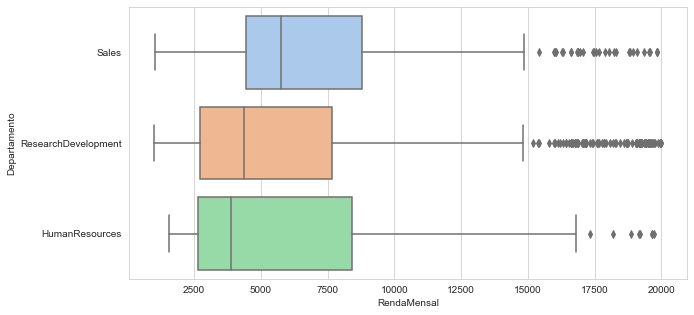

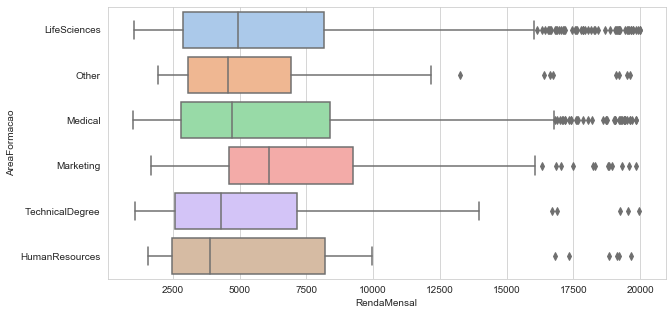

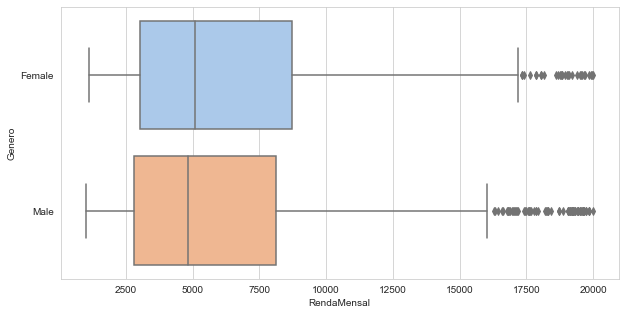

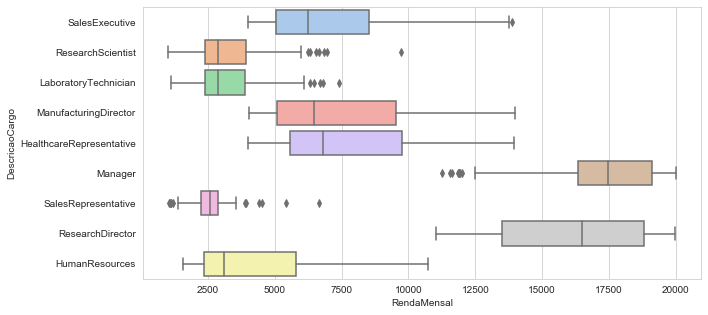

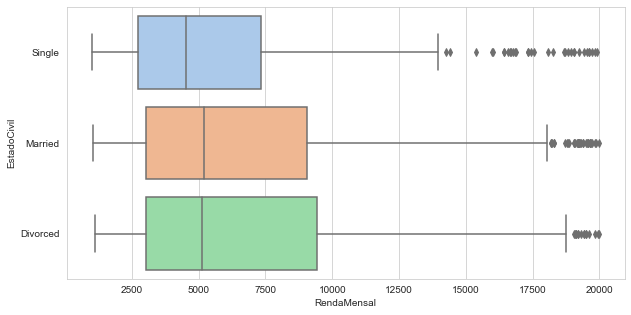

In [26]:
# Lets find some outliers in RendaMensal
plus = ['Departamento', 'AreaFormacao', 'Genero', 'DescricaoCargo', 'EstadoCivil']
for i in plus:
    plt.figure(figsize=[10, 5])
    sns.boxplot(x = 'RendaMensal', y = i, data = df, palette=sns.color_palette('pastel'))
    plt.show()
    print('\n\n')

In [27]:
# Now we can go to RStudio so our predictive analysis be concluded